In [1]:
import tensorflow as tf

from tensorflow import keras

In [2]:
mnist = keras.datasets.mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

print(X_train0.shape, y_train0.shape, X_test0.shape, y_test0.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


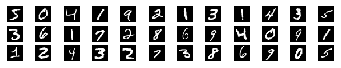

In [4]:
import matplotlib.pylab as plt

plt.figure(figsize=(6, 1))
for i in range(36):
    plt.subplot(3, 12, i+1)
    plt.imshow(X_train0[i], cmap="gray")
    plt.axis("off")
plt.show()

In [5]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [6]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [7]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

#tf.random.set_seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                11775     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [11]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=50, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 3s - loss: 0.0996 - accuracy: 0.3374 - val_loss: 0.0860 - val_accuracy: 0.4873
Epoch 2/50
60000/60000 - 3s - loss: 0.0835 - accuracy: 0.5146 - val_loss: 0.0808 - val_accuracy: 0.5383
Epoch 3/50
60000/60000 - 2s - loss: 0.0778 - accuracy: 0.5547 - val_loss: 0.0746 - val_accuracy: 0.5634
Epoch 4/50
60000/60000 - 2s - loss: 0.0715 - accuracy: 0.5877 - val_loss: 0.0684 - val_accuracy: 0.6021
Epoch 5/50
60000/60000 - 2s - loss: 0.0656 - accuracy: 0.6202 - val_loss: 0.0628 - val_accuracy: 0.6338
Epoch 6/50
60000/60000 - 2s - loss: 0.0605 - accuracy: 0.6524 - val_loss: 0.0582 - val_accuracy: 0.6727
Epoch 7/50
60000/60000 - 2s - loss: 0.0563 - accuracy: 0.6884 - val_loss: 0.0543 - val_accuracy: 0.7108
Epoch 8/50
60000/60000 - 2s - loss: 0.0527 - accuracy: 0.7230 - val_loss: 0.0509 - val_accuracy: 0.7488
Epoch 9/50
60000/60000 - 2s - loss: 0.0495 - accuracy: 0.7547 - val_loss: 0.0479 - val_accuracy: 0.7804
Epoch 10/50
60

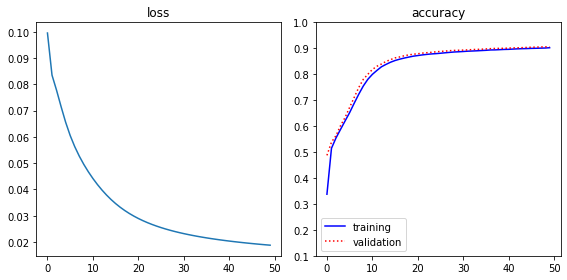

In [12]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title("loss")
plt.subplot(1, 2, 2)
plt.title("accuracy")
plt.ylim(0.1,1)
plt.plot(hist.history['accuracy'], 'b-', label="training")
plt.plot(hist.history['val_accuracy'], 'r:', label="validation")
plt.legend()
plt.tight_layout()
plt.show()